In [11]:
from matplotlib.pyplot import*
import matplotlib.pyplot as plt
from numpy import*
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Questão 3

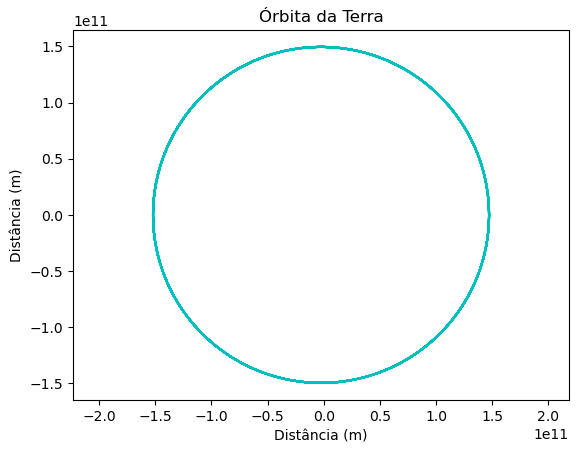

In [12]:
#3a)
G = 6.6738e-11
M_sol = 1.9891e30
R = 1.4710e11
velocidade = 3.0287e4
h = 3600

r = np.array([R, 0]) 
v = np.array([0, velocidade])  

posicoes = [r]

def verlet(r, v, h):
    a = -G * M_sol * r / np.linalg.norm(r)**3
    r_new = r + h * v + 0.5 * h**2 * a
    a_new = -G * M_sol * r_new / np.linalg.norm(r_new)**3
    v_new = v + 0.5 * h * (a + a_new)
    return r_new, v_new

num_steps = 100000  
for _ in range(num_steps):
    r, v = verlet(r, v, h)
    posicoes.append(r)

posicoes = np.array(posicoes)

# Plotando a órbita
plt.plot(posicoes[:, 0], posicoes[:, 1], c='c')
plt.xlabel('Distância (m)')
plt.ylabel('Distância (m)')
plt.title('Órbita da Terra')
plt.axis('equal')  
plt.show()

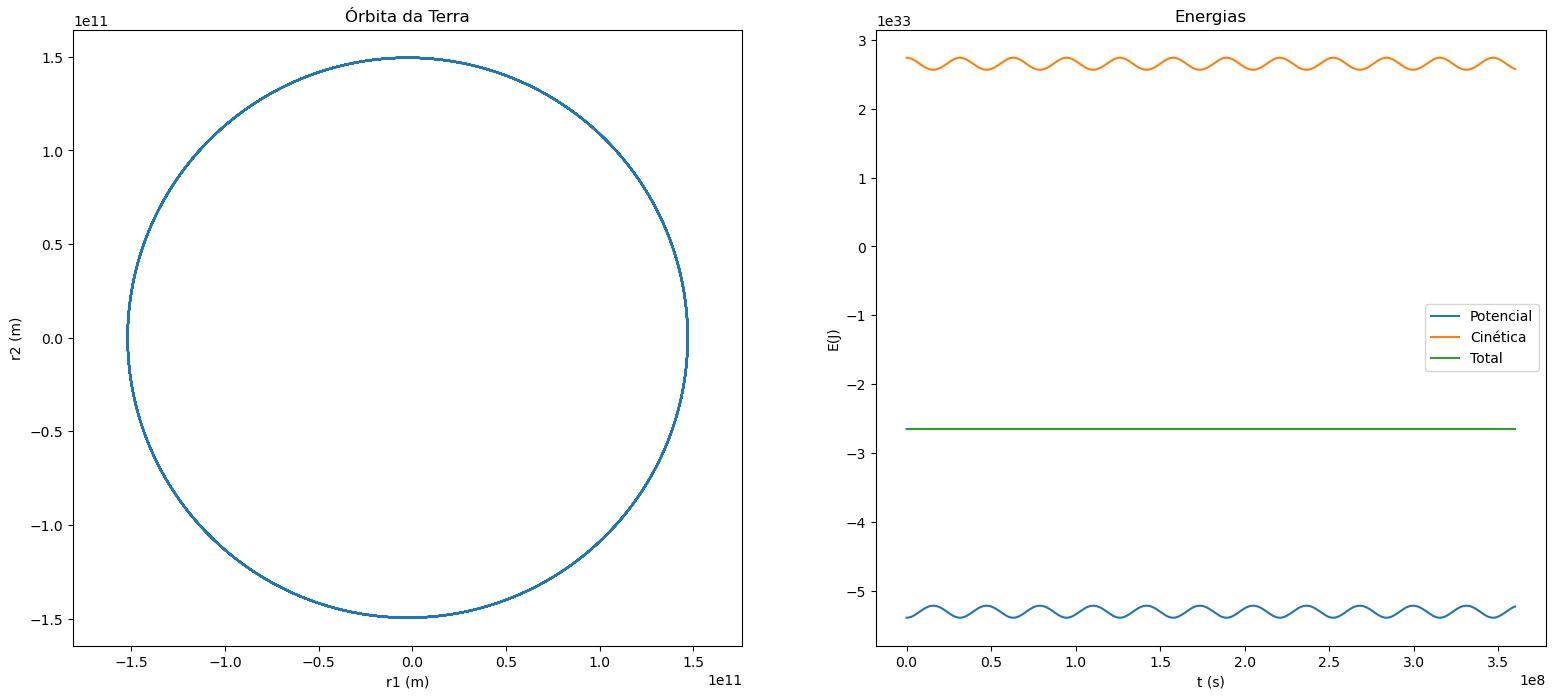

In [15]:
#b)
m_terra = 5.9722e24  

r = np.array([R, 0])
v = np.array([0, velocidade])

posicoes = [r]
velocidades = [v]
e_potencial_t = []
e_cinetica_t = []
e_total_t = []

num_steps = 100000
for i in range(num_steps):
    r, v = verlet(r, v, h)
    posicoes.append(r)
    velocidades.append(v)
    
    energia_potencial = -G * M_sol * m_terra / np.linalg.norm(r)
    energia_cinetica = 0.5 * m_terra * np.dot(v, v)
    energia_total = energia_potencial + energia_cinetica
    
    e_potencial_t.append(energia_potencial)
    e_cinetica_t.append(energia_cinetica)
    e_total_t.append(energia_total)


posicoes = np.array(posicoes)
velocidades = np.array(velocidades)
e_potencial_t = np.array(e_potencial_t)
e_cinetica_t = np.array(e_cinetica_t)
e_total_t = np.array(e_total_t)


fig, ax = plt.subplots(1,2, figsize=(19, 8))

ax[0].plot(posicoes[:, 0], posicoes[:, 1])
ax[0].set_xlabel('r1 (m)')
ax[0].set_ylabel('r2 (m)')
ax[0].set_title('Órbita da Terra')
ax[0].axis('equal')

ax[1].plot(np.arange(num_steps)*h, e_potencial_t, label='Potencial')
ax[1].plot(np.arange(num_steps)*h, e_cinetica_t, label='Cinética')
ax[1].plot(np.arange(num_steps)*h, e_total_t, label='Total')
ax[1].set_xlabel('t (s)')
ax[1].set_ylabel('E(J)')
ax[1].set_title('Energias')

plt.legend()

Text(0.5, 1.0, 'Energia Total da Terra')

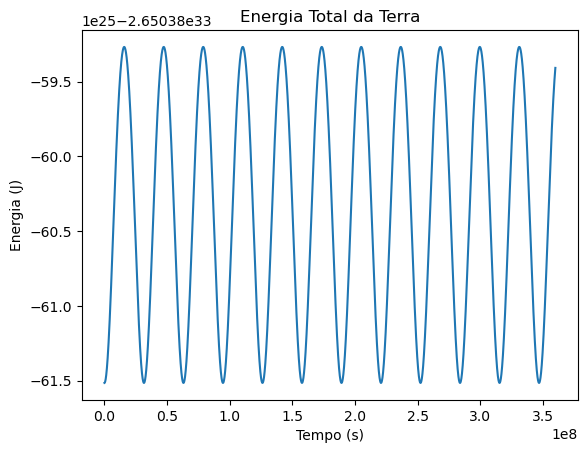

In [16]:
#c)
plt.plot(np.arange(num_steps)*h, e_total_t, label='Total')
plt.xlabel('t(s)')
plt.ylabel('E (J)')

### Questão 4

In [17]:
m = 1.0  
R = 0.08  
v0 = 100.0  
rho = 1.22  
C = 0.47  
g = 9.81  
target_distance = 200.0  
tol = 1.0e-10  
a, b = 0.0, np.pi/2  
h = 0.01  


def f(y, t):
    x, y, vx, vy = y
    v = np.sqrt(vx**2 + vy**2)
    fx = -0.5 * rho * C * np.pi * R**2 * vx * v / m
    fy = -g - 0.5 * rho * C * np.pi * R**2 * vy * v / m
    return np.array([vx, vy, fx, fy])

def rk4(t, r):
    K1 = h * f(r, t)
    K2 = h * f(r + K1/2, t + h/2)
    K3 = h * f(r + K2/2, t + h/2) 
    K4 = h * f(r + K3, t + h)
    return r + (K1 + 2*K2 + 2*K3 + K4) / 6

def simulate_shot(angle):
    t = 0
    x, y = 0.0, 0.0
    vx = v0 * np.cos(angle)
    vy = v0 * np.sin(angle)
    r = np.array([x, y, vx, vy])
    
    while r[1] >= 0:  
        r = rk4(t, r)
        t += h
        if r[0] >= target_distance and r[1] <= 0:
            break
    
    return r[0] - target_distance  


def metodo_bissecao(f, a, b, tol):
    erro = 100
    count = 0
    while erro > tol:
        c = (a + b) / 2
        if f(c) * f(a) > 0:
            a = c
        else:
            b = c
        erro = abs(b - a) / 2
        count += 1
    return (a + b) / 2

def t_funcao(angle):
    return simulate_shot(angle)


angulo = metodo_bissecao(t_funcao, a, b, tol)
angulo2 = np.degrees(angulo)
print(f"O ângulo usado para atingir o alvo é {angulo2:.2f} graus.")


O ângulo usado para atingir o alvo é 15.19 graus.
